In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
print(data.shape)
data.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1, inplace=True)
data.Gender = [1 if each == 'Male' else 0 for each in data.Gender]
data.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
319,429,1,24,4,95741.75,1,1,0,46170.75,0
7537,655,0,38,6,0.00,1,1,1,188639.28,0
206,608,0,41,3,89763.84,1,0,0,199304.74,1
9154,581,0,27,5,102258.11,2,1,0,194681.60,0
3853,654,1,43,9,84673.17,2,0,1,82081.35,0


0    7963
1    2037
Name: Exited, dtype: int64

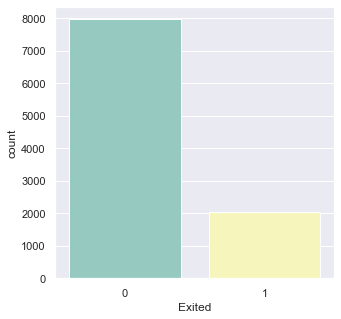

In [5]:
plt.figure(figsize=[5,5])
sns.set(style='darkgrid')
ax = sns.countplot(x='Exited', data=data, palette='Set3')
data.loc[:,'Exited'].value_counts()

In [7]:
y = data.Exited.values
x_data = data.drop(['Exited'], axis=1)
x_data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [8]:
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=7)
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (9000, 9)
y_train shape:  (9000,)
x_test shape:  (1000, 9)
y_test shape:  (1000,)


In [10]:
accuracies={}

In [11]:
#1 Logistic Regression
from sklearn.linear_model import LogisticRegression

# Defining the model
lr = LogisticRegression()

# Training the model:
lr.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred0 = lr.predict(x_test)

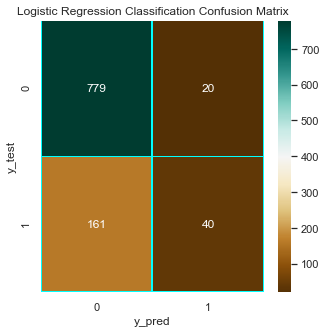

[[779  20]
 [161  40]]


In [12]:
# Confusion matrix for visulalization of our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
lr_cm = confusion_matrix(y_test, y_pred0)

#Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()
print(lr_cm)

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred0))
# Accuracy score
acc_logreg=accuracy_score(y_pred0,y_test,)
accuracies['Logistic Regression'] = acc_logreg*100
print('accuracy is',acc_logreg)


              precision    recall  f1-score   support

           0       0.83      0.97      0.90       799
           1       0.67      0.20      0.31       201

    accuracy                           0.82      1000
   macro avg       0.75      0.59      0.60      1000
weighted avg       0.80      0.82      0.78      1000

accuracy is 0.819


In [14]:
score_lr = lr.score(x_test, y_test)
print(score_lr)

0.819


In [15]:
#2 KNN
from sklearn.neighbors import KNeighborsClassifier

# Defining the model with a k number of 13:
knn = KNeighborsClassifier(n_neighbors=13)

# Training the model:
knn.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred1 = knn.predict(x_test)

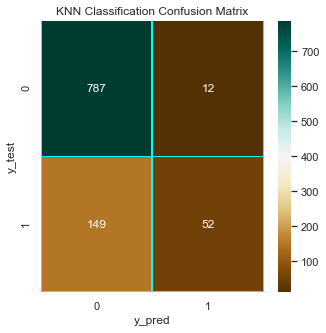

[[787  12]
 [149  52]]


In [16]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
knn_cm = confusion_matrix(y_test, y_pred1)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()
print(knn_cm)

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred1))
# Accuracy score
acc_knncla=accuracy_score(y_pred1,y_test)
accuracies['K-Nearest Neighbors'] = acc_knncla*100
print('accuracy is',acc_knncla)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       799
           1       0.81      0.26      0.39       201

    accuracy                           0.84      1000
   macro avg       0.83      0.62      0.65      1000
weighted avg       0.84      0.84      0.80      1000

accuracy is 0.839


In [18]:
score_knn = knn.score(x_test, y_test)
print(score_knn)

0.839


In [19]:
#3 SVM
from sklearn.svm import SVC

# Defining SVM model
svm = SVC(random_state=2)

# Training model:
svm.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred2 = svm.predict(x_test)

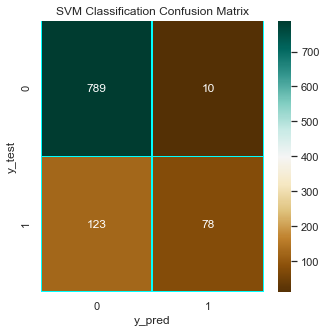

[[789  10]
 [123  78]]


In [20]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
svm_cm = confusion_matrix(y_test, y_pred2)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()
print(svm_cm)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred2))
# Accuracy score
acc_svmcla=accuracy_score(y_pred2,y_test)
accuracies['SVM'] = acc_svmcla*100
print('accuracy is',acc_svmcla)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       799
           1       0.89      0.39      0.54       201

    accuracy                           0.87      1000
   macro avg       0.88      0.69      0.73      1000
weighted avg       0.87      0.87      0.85      1000

accuracy is 0.867


In [22]:
score_svm = svm.score(x_test, y_test)
print(score_svm)

0.867


In [23]:
#4 Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Defining model:
nb = GaussianNB()

# Training the model:
nb.fit(x_train, y_train)

# Predicting:
y_pred3 = nb.predict(x_test)

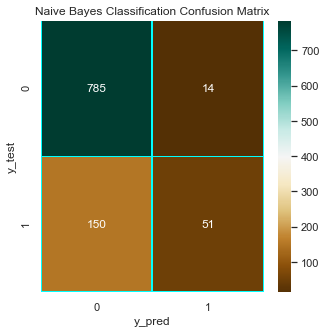

[[785  14]
 [150  51]]


In [24]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
nb_cm = confusion_matrix(y_test, y_pred3)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nb_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()
print(nb_cm)

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred3))
# Accuracy score
acc_nbcla=accuracy_score(y_pred3,y_test)
accuracies['Naive Bayes'] = acc_nbcla*100
print('accuracy is',acc_nbcla)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       799
           1       0.78      0.25      0.38       201

    accuracy                           0.84      1000
   macro avg       0.81      0.62      0.64      1000
weighted avg       0.83      0.84      0.80      1000

accuracy is 0.836


In [26]:
score_nb = nb.score(x_test, y_test)
print(score_nb)

0.836


In [27]:
#5 Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Defining the model:
dt = DecisionTreeClassifier()

# Training:
dt.fit(x_train, y_train)

# Predicting:
y_pred4 = dt.predict(x_test)

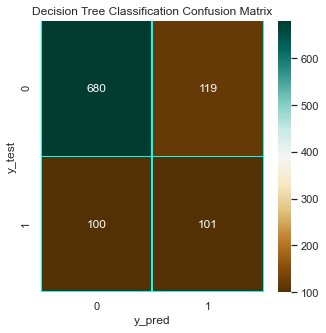

[[680 119]
 [100 101]]


In [28]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
dt_cm = confusion_matrix(y_test, y_pred4)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dt_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()
print(dt_cm)

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred4))
# Accuracy score
acc_dtcla=accuracy_score(y_pred4,y_test)
accuracies['Decision Tree Classification'] = acc_dtcla*100
print('accuracy is',acc_dtcla)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       799
           1       0.46      0.50      0.48       201

    accuracy                           0.78      1000
   macro avg       0.67      0.68      0.67      1000
weighted avg       0.79      0.78      0.78      1000

accuracy is 0.781


In [30]:
score_dt = dt.score(x_test, y_test)
print(score_dt)

0.781


In [31]:
#6 Random Forest
from sklearn.ensemble import RandomForestClassifier

# Defining:
rf = RandomForestClassifier(n_estimators=100, random_state=3)

# Training:
rf.fit(x_train, y_train)

# Predicting:
y_pred5 = rf.predict(x_test)

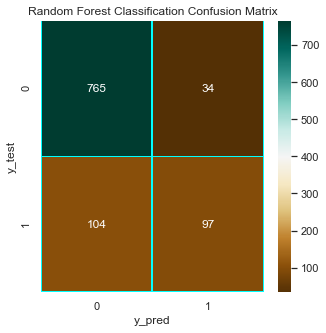

[[765  34]
 [104  97]]


In [32]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
rf_cm = confusion_matrix(y_test, y_pred5)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()
print(rf_cm)

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred5))
# Accuracy score
acc_rfcla=accuracy_score(y_pred5,y_test)
accuracies['Random Forest Classification'] = acc_rfcla*100
print('accuracy is',acc_rfcla)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       799
           1       0.74      0.48      0.58       201

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000

accuracy is 0.862


In [34]:
score_rf = rf.score(x_test, y_test)
print(score_rf)

0.862


In [35]:
#Accuracies
Accuracies = pd.Series([acc_logreg, acc_knncla, acc_svmcla, acc_nbcla, acc_dtcla, acc_rfcla], 
                        index=['logistic_regression_accuracy', 'knn_accuracy', 'svm_accuracy', 'naive_bayes_accuracy', 'decision_tree_accuracy', 'random_forest_accuracy']) 
Accuracies

logistic_regression_accuracy    0.819
knn_accuracy                    0.839
svm_accuracy                    0.867
naive_bayes_accuracy            0.836
decision_tree_accuracy          0.781
random_forest_accuracy          0.862
dtype: float64

In [36]:
#Scores
data_scores = pd.Series([score_lr, score_knn, score_svm, score_nb, score_dt, score_rf], 
                        index=['logistic_regression_score', 'knn_score', 'svm_score', 'naive_bayes_score', 'decision_tree_score', 'random_forest_score']) 
data_scores

logistic_regression_score    0.819
knn_score                    0.839
svm_score                    0.867
naive_bayes_score            0.836
decision_tree_score          0.781
random_forest_score          0.862
dtype: float64

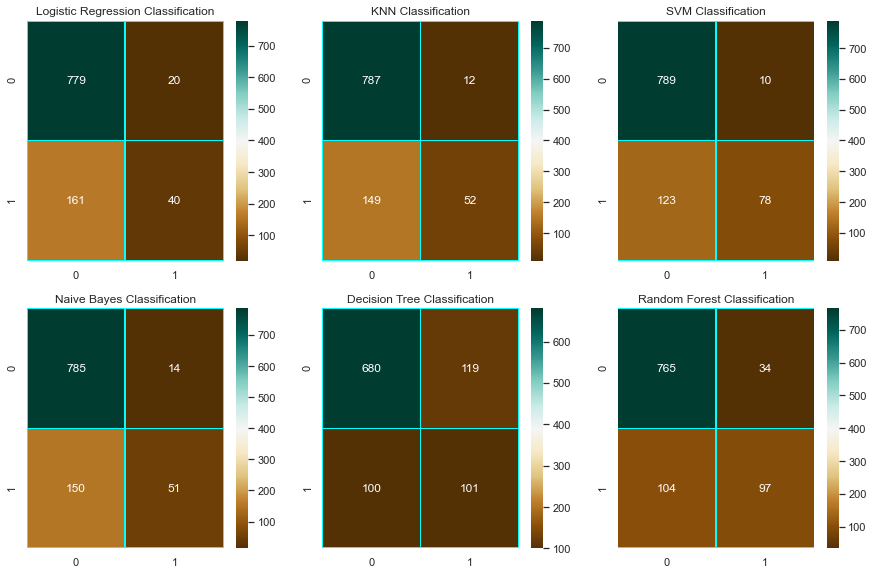

In [37]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Logistic Regression Classification')

ax2 = fig.add_subplot(3, 3, 2) # row, column, position
ax2.set_title('KNN Classification')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Naive Bayes Classification')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Decision Tree Classification')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Random Forest Classification')

sns.heatmap(data=lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax1, cmap='BrBG')
sns.heatmap(data=knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax2, cmap='BrBG')   
sns.heatmap(data=svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax3, cmap='BrBG')
sns.heatmap(data=nb_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax4, cmap='BrBG')
sns.heatmap(data=dt_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax5, cmap='BrBG')
sns.heatmap(data=rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax6, cmap='BrBG')
plt.show()

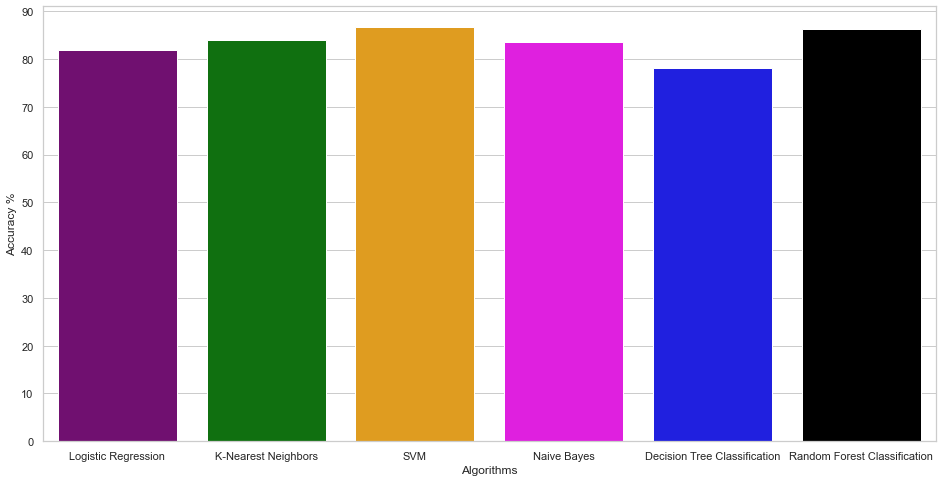

In [38]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")#percent so multiply by 100
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [39]:
#Hence we can check here that,SVM has more accuracy compared to other models for this dataset